In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
import sys  
sys.path.append( '..')

In [3]:
from src.stocks import build_model,build_n_forecast

/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [31]:
stock_names = ["RELIANCE.NS"] #, "TCS.NS"]

In [32]:
forecast_df = build_n_forecast(stock_names)

Building model for  RELIANCE.NS


/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


mean Square error in train data: 1.863083418677835e-06


In [33]:
forecast_df

,Date,forecast,Stock,Forecast_period
0,2024-02-29,2941.527100,RELIANCE.NS,2024-03-01
1,2024-03-01,2932.448975,RELIANCE.NS,2024-03-02
2,2024-03-04,2959.322021,RELIANCE.NS,2024-03-05
3,2024-03-05,2949.711670,RELIANCE.NS,2024-03-06
4,2024-03-06,2950.224365,RELIANCE.NS,2024-03-07
5,2024-03-07,2927.518311,RELIANCE.NS,2024-03-08
6,2024-03-11,2922.198242,RELIANCE.NS,2024-03-12


In [34]:
# features_path = f"features_{stock_name}.csv"
# target_path = f"target_{stock_name}.csv"
# test_real_path = f"features_{stock_name}_test.csv"

# X = pd.read_csv(features_path).set_index("Date")
# y = pd.read_csv(target_path).set_index("Date")
# test_real = pd.read_csv(test_real_path).set_index("Date")
# xgb =  build_model(X,y)
# y_pred = xgb.predict(X)

In [35]:
test_target_path= f"target_{stock_name}_test.csv"
y_actual = pd.read_csv(test_target_path).set_index("Date")

In [36]:
y_pred = forecast_df["forecast"]

In [42]:

def plot_actual_vs_pred(y,y_pred,tail=10,pred_col=0):

    if not isinstance(y_pred,pd.DataFrame):
        y_pred = pd.DataFrame(y_pred)
        y_pred.index = y.index
    plot_df = pd.concat([y,y_pred],axis='columns')
    plot_df = plot_df.rename(columns={'Close_next_1d':'Actual',pred_col:'Predicted',}).reset_index(names='Date').tail(tail)

    # # Melt the DataFrame to long-format for easier plotting with Seaborn
    # data_long = plot_df.melt(id_vars=['Date'],value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Value')
    
    # # Plotting
    # plt.figure(figsize=(10, 6))
    # sns.lineplot(data=data_long, x=data_long.Date, y='Value', hue='Type', style='Type',
    #              markers=True, dashes=True, alpha=0.8)  # Adjust transparency with the alpha parameter

    # Plot the results
    sns.lineplot(x=plot_df.index, y=plot_df['Actual'], label='Actual')
    sns.lineplot(x=plot_df.index, y=plot_df['Predicted'], label='Forecast',dashes=True)
    plt.legend()
    
    plt.title('Comparison of Actual and Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(title='Type')
    plt.show()

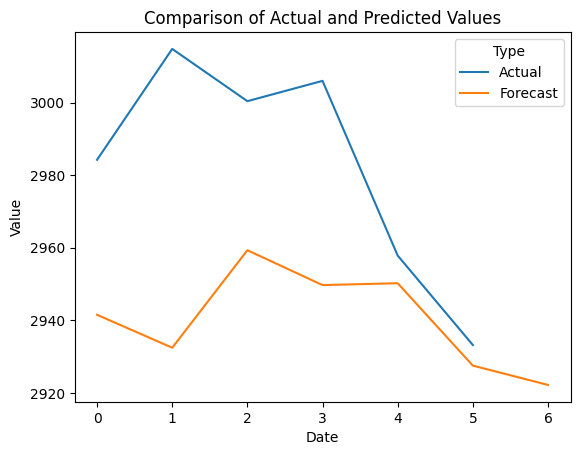

In [43]:
plot_actual_vs_pred(y_actual,y_pred,tail=30,pred_col="forecast")

In [ ]:

plt.plot(y.tail(10))
plt.plot(y_pred[-10:])
plt.show()

In [28]:
imp = pd.DataFrame(xgb_model.feature_importances_,index=X.columns,columns=["imp_score"]).sort_values("imp_score",ascending=False)

NameError: name 'xgb_model' is not defined

In [29]:
xgb.plot_importance(xgb_model,importance_type='gain',max_num_features=20,height=0.5)

AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'